# Introduction to Linear algebra

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
''' Matrix check operations '''

def is_symmetric(matrix):
    np.all(matrix == matrix.T)

def is_orthogonal(matrix):
    rows, cols = matrix.shape
    if rows != cols:
        return False
    
    P = matrix * matrix.T
    I = np.identity(rows)

    return np.allclose(P, I)

The homogeneous transformation matrix that represents pose $ \mathbf{p} = (x, y, \theta)^T $ w.r.t. to the origin $ (0, 0, 0)^T $ of the global coordinate system is given by

\begin{equation}
    \mathbf{P} = \begin{pmatrix}
    \cos{\theta} & -\sin{\theta} & x \\
    \sin{\theta} & \cos{\theta} & y \\
    0 & 0 & 1
    \end{pmatrix}
    = \begin{pmatrix}
    \mathbf{R} & \mathbf{t} \\
    0 & 1 \\
    \end{pmatrix}
\end{equation}

where

\begin{equation}
    \mathbf{R} = \begin{pmatrix}
    \cos{\theta} & -\sin{\theta} \\
    \sin{\theta} & \cos{\theta} \\
    \end{pmatrix}
\end{equation}
\begin{equation}
    \mathbf{t} = \begin{pmatrix}
    x \\
    y \\
    \end{pmatrix}
\end{equation}

In [57]:
def system_matrix(x, y, theta):
    cos = np.cos(theta)
    sin = np.sin(theta)
    return np.array([
        [cos, -sin, x],
        [sin,  cos, y],
        [  0,    0, 1]
    ])

## Coordinate frame transformation


### Local $ \rightarrow $ global

While being at pose $ \mathbf{p_1} = (x_1 , y_1 , θ_1 )^T $, the robot senses a landmark at position
$ \mathbf{l} = (l_x , l_y) $ w.r.t. its local frame.

Coordinates of $ \mathbf{l} $ w.r.t. the global frame are then:

\begin{equation}
    \mathbf{l_{global}} = \mathbf{P} \cdot \mathbf{l_{local}}
\end{equation}

where $ \mathbf{l_{local}} $ is a position vector of a landmark given by


\begin{equation}
    \mathbf{l_{local}} = \begin{pmatrix}
    l_x \\
    l_y \\
    1
    \end{pmatrix}
\end{equation}

In [58]:
def position_vector(x, y):
    return np.array([
        x,
        y,
        1
    ])

Robot's coordinate frame matrix:

[[ 1. -0.  4.]

 [ 0.  1.  2.]

 [ 0.  0.  1.]]

Landmark's position vector:

[-2  5  1]

Landmark's global position:

[2. 7. 1.]


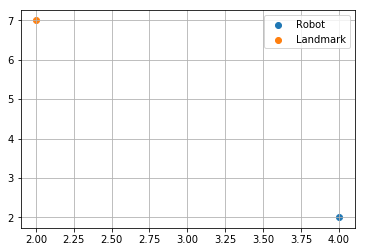

In [59]:
# Robot
x1, y1, theta1 = 4, 2, 0
p1 = (x1, y1, theta1)
P1 = system_matrix(*p1)
print("Robot's coordinate frame matrix:")
print(P1)

# Landmark w.r.t. robot's frame
l_local = position_vector(-2, 5)
print("Landmark's position vector:")
print(l_local)

# Landmark w.r.t. global frame
l_global = P1.dot(l_local)
lx_global = l_global[0]
ly_global = l_global[1]
print("Landmark's global position:")
print(l_global)

# Plot the global positions
plt.scatter([x1], [y1], label = "Robot")
plt.scatter([lx_global], [ly_global], label = "Landmark")

plt.grid()
plt.legend(loc = "best")
plt.show()

### Global $ \rightarrow $ local

Now imagine that you are given the landmark’s coordinates w.r.t. the global frame.
The coordinates that the robot will sense in its local frame are then

\begin{equation}
    \mathbf{l_{local}} = \mathbf{P}^{-1} \cdot \mathbf{l_{global}}
\end{equation}

where the inverse of the system matrix is

\begin{equation}
    \mathbf{P}^{-1} = \begin{pmatrix}
    \mathbf{R}^{T} & -\mathbf{R}^{T}\mathbf{t} \\
    0 & 1 \\
    \end{pmatrix}
\end{equation}


In [60]:
def inv_system_matrix(system_matrix):
    R = system_matrix[0:2, 0:2]
    t = system_matrix[0:2, 2]
    
    R_new = R.T
    t_new = (-R.T).dot(t)
    
    return np.block([
        [R_new, np.expand_dims(t_new, axis = 1)],
        [0, 0, 1]
    ])

In [61]:
# Inverse of the robot's system matrix
P1_inv = inv_system_matrix(P1)
I = np.identity(P1.shape[0])

# Make sure that P1_inv is really an inverse of P1
assert np.allclose(P1.dot(P1_inv), I) 

l_global = position_vector(lx_global, ly_global)
l_local = P1_inv.dot(l_global)
print("Landmark's position in the robot's frame:")
print(l_local)

Landmark's position in the robot's frame:

[-2.  5.  1.]


### Robot's movement

The robot moves to a new pose $ \mathbf{p_2} = (x_2 , y_2 , \theta_2)^T $ w.r.t. the global frame. Now, we want to find the transformation matrix $ \mathbf{T_{12}} $ that represents the new pose $ \mathbf{p_2} $ w.r.t. $ \mathbf{p_1} $. 

\begin{equation}
    \mathbf{P_2} = \mathbf{T_{12}} \cdot \mathbf{P_1}
\end{equation}

In order to do that we are going to write $ \mathbf{T_{12}} $ as a product of homogeneous transformation matrices.


\begin{equation}
    \mathbf{P_{2}} = \mathbf{P_2} \cdot \mathbf{I} = \mathbf{P_2} \cdot \mathbf{P_1}^{-1} \cdot \mathbf{P_1} = \mathbf{T_{12}} \cdot \mathbf{P_1}
\end{equation}

where

\begin{equation}
    \mathbf{T_{12}} = \mathbf{P_2} \cdot \mathbf{P_1}^{-1}
\end{equation}

In [62]:
# Robot's new position
x2, y2, theta2 = 1, 1, np.pi/2
p2 = (x2, y2, theta2)
P2 = system_matrix(*p2)
print("Robot's new coordinate frame matrix:")
print(P2)

# Transformation matrix
print("Transformation matrix from P1 to P2:")
T_12 = P2.dot(P1_inv)
print(T_12)

# Make sure that T_12 transforms P1 to P2
assert np.allclose(P2, T_12.dot(P1))

Robot's new coordinate frame matrix:

[[ 6.123234e-17 -1.000000e+00  1.000000e+00]

 [ 1.000000e+00  6.123234e-17  1.000000e+00]

 [ 0.000000e+00  0.000000e+00  1.000000e+00]]

Transformation matrix from P1 to P2:

[[ 6.123234e-17 -1.000000e+00  3.000000e+00]

 [ 1.000000e+00  6.123234e-17 -3.000000e+00]

 [ 0.000000e+00  0.000000e+00  1.000000e+00]]


The robot is at position $ \mathbf{p_2} $. The landmark's position w.r.t. the robot’s local frame is now:

\begin{equation}
\begin{cases}
    \mathbf{l_{global}} = \mathbf{P_1} \cdot \mathbf{l_{local}^{P_1}} \\
    \mathbf{l_{global}} = \mathbf{P_2} \cdot \mathbf{l_{local}^{P_2}}
\end{cases}
\end{equation}

\begin{equation}
\mathbf{P_1} \cdot \mathbf{l_{local}^{P_1}} = \mathbf{P_2} \cdot \mathbf{l_{local}^{P_2}} \\
\end{equation}

Therefore:

\begin{equation}
    \mathbf{l_{local}^{P_2}} = \mathbf{P_2}^{-1} \cdot \mathbf{P_1} \cdot \mathbf{l_{local}^{P_1}}
\end{equation}

In [63]:
# Landmarks position w.r.t. P2
l_local_P1 = l_local
l_local_P2 = inv_system_matrix(P2).dot(P1).dot(l_local_P1)
print("Landmark's local position vector in the robot's new coordinate frame:")
print(l_local_P2)

Landmark's local position vector in the robot's new coordinate frame:

[ 6. -1.  1.]


### 3D Rotations and Euler angles in Python
**Euler’s theorem**
“Each movement of a rigid body in three-dimensional space, with a point that remains fixed, is equivalent to a single rotation of the body around an axis passing through the fixed point”

This theorem was formulated by Euler in 1775.

In other words, if we consider two Cartesian reference systems, one (X0,Y0,Z0) and the other (X1,Y1,Z1) which have the same origin point O, but different orientation, there will always be a single axis of rotation with which the first system will assume the same configuration as the second system.

Angoli di Eulero - due sistemi di riferimento
In an even simpler way, any rotation can be described by a sequence of three successive rotations, also called elementary rotations, which occur around one of the three coordinate axes X, Y and Z


**Elementary rotations**
There are therefore three elementary rotations, each around its Cartesian reference axis X, Y and Z. But the rotation around an axis can occur in two opposite directions. But which of the two is the positive one?

Rotation around an axis is positive if it meets the right hand rule. For example in the case of rotation around the z axis, the rotation will be positive depending on the arrangement of the X and Y axes in the representation.

Questa immagine ha l'attributo alt vuoto; il nome del file è Angoli-di-Eulero-Rotazione-elementare-regola-della-mano-destra.jpg
Therefore the direction of the three elementary rotations will be the one shown in the following figure.

Questa immagine ha l'attributo alt vuoto; il nome del file è Angoli-di-Eulero-verso-delle-rotazioni-elementari.jpg
Each elementary rotation can be transcribed as a 3×3 matrix (homogeneous transformation).

Rotation on the X axis
 R{x} = \begin{pmatrix} 1 & 0 & 0 \\ 0 & \cos\theta & -\sin\theta \\ 0 & \sin\theta & \cos\theta \end{pmatrix} 

Rotation on the Y axis
 R{y} = \begin{pmatrix} \cos\theta & 0 & \sin\theta \\ 0 & 1 & 0 \\ -\sin\theta & 0 & \cos\theta \end{pmatrix} 

Rotation on the Z axis
 R{z} = \begin{pmatrix} \cos\theta & -\sin\theta & 0 \\ \sin\theta & \cos\theta & 0 \\ 0 & 0 & 1 \end{pmatrix} 

In [2]:
import numpy as np
import math as m
  
def Rx(theta):
  return np.matrix([[ 1, 0           , 0           ],
                   [ 0, m.cos(theta),-m.sin(theta)],
                   [ 0, m.sin(theta), m.cos(theta)]])
  
def Ry(theta):
  return np.matrix([[ m.cos(theta), 0, m.sin(theta)],
                   [ 0           , 1, 0           ],
                   [-m.sin(theta), 0, m.cos(theta)]])
  
def Rz(theta):
  return np.matrix([[ m.cos(theta), -m.sin(theta), 0 ],
                   [ m.sin(theta), m.cos(theta) , 0 ],
                   [ 0           , 0            , 1 ]])

**Euler’s angles**
Therefore a generic rotation is described in turn by a rotation matrix R. Any matrix of this type can be described as the product of successive rotations around the principal axes of the XYZ coordinates, taken in a precise order.

So any rotation could be decomposed into the sequence of three elementary matrices. For example, the most intuitive is that which is obtained first by performing a rotation on the X axis by an angle φ, then on the Y axis by an angle θ and finally on the Z axis by an angle ψ

 R{x} (\varphi) \rightarrow R{y} (\theta) \rightarrow R{z} (\psi) 

The triplet of the angles used in these elementary rotations are the Euler angles and are normally indicated (φ, θ, ψ).

Let’s take an example in Python. We choose three euler angles and then we multiply the elementary rotation matrices R ZYZ

In [3]:
phi = m.pi/2
theta = m.pi/4
psi = m.pi/2
print("phi =", phi)
print("theta  =", theta)
print("psi =", psi)
  
  
R = Rz(psi) * Ry(theta) * Rx(phi)
print(np.round(R, decimals=2))

phi = 1.5707963267948966
theta  = 0.7853981633974483
psi = 1.5707963267948966
[[ 0.   -0.    1.  ]
 [ 0.71  0.71 -0.  ]
 [-0.71  0.71  0.  ]]


But it is also possible to perform the reverse operation. That is, knowing the rotation matrix, it is possible to derive the three Euler angles.

In [4]:
import sys
tol = sys.float_info.epsilon * 10
  
if abs(R.item(0,0))< tol and abs(R.item(1,0)) < tol:
   eul1 = 0
   eul2 = m.atan2(-R.item(2,0), R.item(0,0))
   eul3 = m.atan2(-R.item(1,2), R.item(1,1))
else:   
   eul1 = m.atan2(R.item(1,0),R.item(0,0))
   sp = m.sin(eul1)
   cp = m.cos(eul1)
   eul2 = m.atan2(-R.item(2,0),cp*R.item(0,0)+sp*R.item(1,0))
   eul3 = m.atan2(sp*R.item(0,2)-cp*R.item(1,2),cp*R.item(1,1)-sp*R.item(0,1))
  
print("phi =", eul1)
print("theta  =", eul2)
print("psi =", eul3)

phi = 1.5707963267948966
theta  = 0.7853981633974483
psi = 1.5707963267948966
